In [1]:
#importing relevant libraries
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

# Question 2

In [2]:
#read csv file
df = pd.read_csv(r'C:\Users\vivia\Desktop\ANL252\ECA\ECA_data.csv')

df

,ID,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,1,1,1.0,2.0,30,0,...,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,0,0,2.0,2.0,31,0,...,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,0,0,3.0,1.0,51,0,...,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,0,0,2.0,1.0,58,-1,...,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,0,1,2.0,1.0,42,0,...,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18764,18762,220000,33065.900,225862,0,0,3.0,1.0,39,0,...,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18765,18763,150000,294.525,149966,0,0,3.0,2.0,43,-1,...,1828,3502,8979,5190,0,3526,8998,129,0,0
18766,18764,30000,623.875,30327,1,0,2.0,2.0,37,3,...,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18767,18765,80000,0.000,94607,1,0,3.0,1.0,41,-1,...,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


##### 1) Remove duplicates

In [3]:
df = df[~df.duplicated()]
df.shape

(18766, 24)

In [4]:
#preliminary check on data set

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18766 entries, 0 to 18768
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18766 non-null  int64  
 1   LIMIT      18766 non-null  int64  
 2   BALANCE    18766 non-null  float64
 3   INCOME     18766 non-null  int64  
 4   RATING     18766 non-null  int64  
 5   GENDER     18766 non-null  int64  
 6   EDUCATION  18753 non-null  float64
 7   MARITAL    18728 non-null  float64
 8   AGE        18766 non-null  int64  
 9   S1         18766 non-null  int64  
 10  S2         18766 non-null  int64  
 11  S3         18766 non-null  int64  
 12  S4         18766 non-null  int64  
 13  S5         18766 non-null  int64  
 14  B1         18766 non-null  int64  
 15  B2         18766 non-null  int64  
 16  B3         18766 non-null  int64  
 17  B4         18766 non-null  int64  
 18  B5         18766 non-null  int64  
 19  R1         18766 non-null  int64  
 20  R2    

##### 2) Remove missing values

In [5]:
df.isnull().values.sum()

51

In [6]:
#remove rows with any missing values
df = df.dropna(how='any')


In [7]:
df.shape

(18717, 24)

##### 3) Remove ambiguous data

In [8]:
#Remove impossible values for AGE
drop_age = df[(df['AGE']==-1) | (df['AGE']==199)].index
drop_age = list(drop_age)
df = df.drop(drop_age,axis=0).reset_index(drop=True)

#remove '$' & ',' sign from column R3
df['R3'] = df['R3'].str.replace('[$,]','')


df.shape

C:\Users\vivia\AppData\Local\Temp\ipykernel_4108\3621768073.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['R3'] = df['R3'].str.replace('[$,]','')


(18707, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18707 entries, 0 to 18706
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18707 non-null  int64  
 1   LIMIT      18707 non-null  int64  
 2   BALANCE    18707 non-null  float64
 3   INCOME     18707 non-null  int64  
 4   RATING     18707 non-null  int64  
 5   GENDER     18707 non-null  int64  
 6   EDUCATION  18707 non-null  float64
 7   MARITAL    18707 non-null  float64
 8   AGE        18707 non-null  int64  
 9   S1         18707 non-null  int64  
 10  S2         18707 non-null  int64  
 11  S3         18707 non-null  int64  
 12  S4         18707 non-null  int64  
 13  S5         18707 non-null  int64  
 14  B1         18707 non-null  int64  
 15  B2         18707 non-null  int64  
 16  B3         18707 non-null  int64  
 17  B4         18707 non-null  int64  
 18  B5         18707 non-null  int64  
 19  R1         18707 non-null  int64  
 20  R2    

##### 4) Update data types

In [10]:
#Change EDUCATIOn & MARITAL from float to int to remove decimal places
df[['EDUCATION','MARITAL']] = df[['EDUCATION','MARITAL']].astype(int)

#Create a list of data types to update
update_dtypes = [str,str,str,str,int,str,str,str,str,str]

#create a list of variables where the datatype needs to be changed
update_vars = ['RATING','GENDER','EDUCATION','MARITAL','R3','S1','S2','S3','S4','S5']

#create dictionary with variable as keys and datatype as values
update = dict(zip(update_vars,update_dtypes))

#Update datatypes for dataframe
df = df.astype(update)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18707 entries, 0 to 18706
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         18707 non-null  int64  
 1   LIMIT      18707 non-null  int64  
 2   BALANCE    18707 non-null  float64
 3   INCOME     18707 non-null  int64  
 4   RATING     18707 non-null  object 
 5   GENDER     18707 non-null  object 
 6   EDUCATION  18707 non-null  object 
 7   MARITAL    18707 non-null  object 
 8   AGE        18707 non-null  int64  
 9   S1         18707 non-null  object 
 10  S2         18707 non-null  object 
 11  S3         18707 non-null  object 
 12  S4         18707 non-null  object 
 13  S5         18707 non-null  object 
 14  B1         18707 non-null  int64  
 15  B2         18707 non-null  int64  
 16  B3         18707 non-null  int64  
 17  B4         18707 non-null  int64  
 18  B5         18707 non-null  int64  
 19  R1         18707 non-null  int64  
 20  R2    

#### Extra pre-processing task - Removing outliers

In [11]:
df.describe()

,ID,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
count,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000,1.870700e+04,18707.000000,18707.000000,18707.000000,18707.000000
mean,9381.995937,168335.044636,9136.823407,177846.903886,35.538462,50069.705885,48249.942802,45097.971561,41127.475865,39690.696050,6.033098e+03,5656.672315,4939.935746,4770.806062,5195.074731
std,5416.853252,129503.452122,13056.692396,143206.451816,9.161899,71984.518738,70374.144907,66156.247415,61753.167798,59963.897709,2.293080e+04,18639.093512,16481.357381,15053.436795,17449.368395
min,1.000000,10000.000000,0.000000,10000.000000,21.000000,-69777.000000,-157264.000000,-65167.000000,-81334.000000,-209051.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4689.500000,50000.000000,644.262500,56467.000000,28.000000,3101.500000,2871.500000,2532.500000,1965.000000,1440.000000,1.000000e+03,582.000000,316.000000,285.500000,223.500000
50%,9383.000000,140000.000000,3976.525000,148182.000000,34.000000,21419.000000,20453.000000,19534.000000,18373.000000,17446.000000,2.138000e+03,2000.000000,1500.000000,1507.000000,1556.000000
75%,14073.500000,240000.000000,11988.637500,257215.500000,41.000000,65251.500000,62110.000000,57786.000000,50844.000000,49870.500000,5.002000e+03,5000.000000,4073.500000,4074.500000,4100.000000
max,18766.000000,800000.000000,130692.450000,908846.000000,80.000000,743970.000000,855086.000000,706864.000000,823540.000000,514975.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,527143.000000


In [12]:
#Select columns that have numeric varaibles only
cols = df.select_dtypes('number').columns
cols

Index(['ID', 'LIMIT', 'BALANCE', 'INCOME', 'AGE', 'B1', 'B2', 'B3', 'B4', 'B5',
       'R1', 'R2', 'R3', 'R4', 'R5'],
      dtype='object')

In [13]:
#Create a subset dataframe for numerical columns
df_sub = df.loc[:, cols]
df_sub

,ID,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
0,1,210000,0.000,235822,30,0,0,0,0,0,0,0,0,0,0
1,2,260000,10928.050,278481,31,54074,46407,38874,31324,24031,2000,2000,2000,2000,72000
2,3,400000,65397.850,431993,51,343591,352484,338823,283288,185288,15000,14000,11500,8000,7000
3,4,20000,3695.300,22368,58,21470,200,0,28740,1295,0,0,28740,1565,0
4,5,180000,68.250,166900,42,1260,598,2056,4300,1802,598,2056,4300,1802,3691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18702,18762,220000,33065.900,225862,39,192815,208365,88004,31237,15980,20000,5003,3047,5000,1000
18703,18763,150000,294.525,149966,43,1828,3502,8979,5190,0,3526,8998,129,0,0
18704,18764,30000,623.875,30327,37,3356,2758,20878,20582,19357,0,22000,4200,2000,3100
18705,18765,80000,0.000,94607,41,78379,76304,52774,11855,48944,3409,1178,1926,52964,1804


In [14]:
#Remove outliers that are outside 3 standard deviations from mean for all columns; 
lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

#Replace outliers with NAN in main dataframe
df.loc[:, cols] = df_sub.where(lim, np.nan)

In [15]:
#Drop null values
df.dropna(inplace=True)

In [16]:
df.shape

(17053, 24)

In [17]:
df=df.set_index('ID')

In [18]:
df

,LIMIT,BALANCE,INCOME,RATING,GENDER,EDUCATION,MARITAL,AGE,S1,S2,...,B1,B2,B3,B4,B5,R1,R2,R3,R4,R5
ID,,,,,,,,,,,,,,,,,,,,,
1,210000.0,0.000,235822.0,1,1,1,2,30.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20000.0,3695.300,22368.0,0,0,2,1,58.0,-1,2,...,21470.0,200.0,0.0,28740.0,1295.0,0.0,0.0,28740.0,1565.0,0.0
5,180000.0,68.250,166900.0,0,1,2,1,42.0,0,0,...,1260.0,598.0,2056.0,4300.0,1802.0,598.0,2056.0,4300.0,1802.0,3691.0
6,180000.0,22702.400,195515.0,0,0,2,2,26.0,2,2,...,132185.0,126527.0,126407.0,131572.0,127154.0,5.0,5008.0,10006.0,10.0,5004.0
7,30000.0,4950.750,23160.0,0,0,3,2,44.0,2,2,...,30728.0,29701.0,29121.0,29715.0,0.0,0.0,600.0,594.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18761,80000.0,12697.475,92486.0,1,0,2,2,34.0,2,2,...,77708.0,79384.0,77519.0,82607.0,81158.0,3500.0,0.0,7000.0,0.0,4000.0
18762,220000.0,33065.900,225862.0,0,0,3,1,39.0,0,0,...,192815.0,208365.0,88004.0,31237.0,15980.0,20000.0,5003.0,3047.0,5000.0,1000.0
18763,150000.0,294.525,149966.0,0,0,3,2,43.0,-1,-1,...,1828.0,3502.0,8979.0,5190.0,0.0,3526.0,8998.0,129.0,0.0,0.0


# Question 3

##### 1st Visualization - Heatmap (Shows overview on correlations between variables)

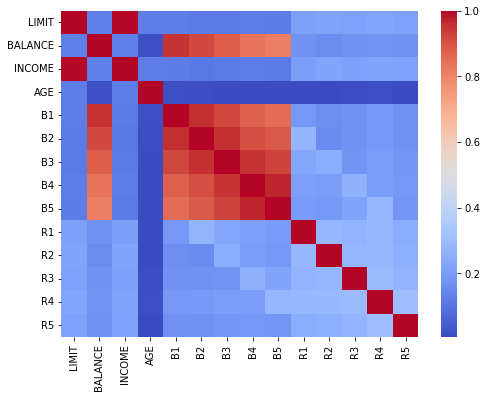

In [19]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm');

##### 2nd Visualization - Pie Charts (Show distribution of categorical data)

Text(0, 0.5, 'MARITAL')

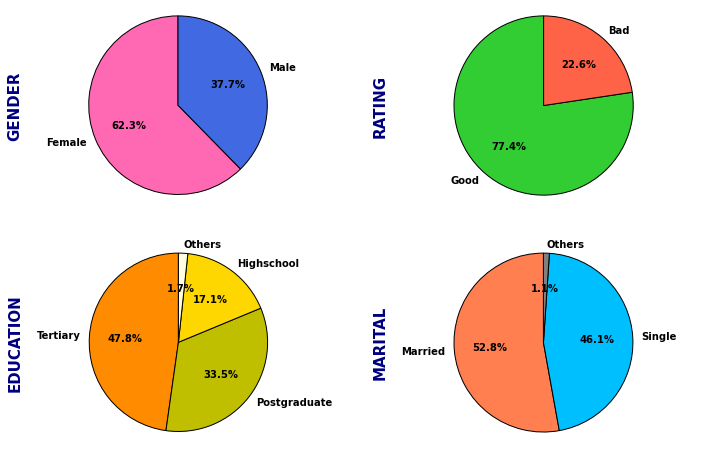

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
df['GENDER'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90,
                                 labels=['Female','Male'],colors=['hotpink','royalblue'],
                                wedgeprops={'edgecolor':'k'},
                                textprops={'fontweight':'bold'});
plt.axis('equal')
ax1.set_ylabel('GENDER',size=15,fontdict={'weight':'bold','color':'navy'})

ax2 = fig.add_subplot(222)
df['RATING'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90,
                                 labels=['Good','Bad'],colors=['limegreen','tomato'],
                                wedgeprops={'edgecolor':'k'},
                                textprops={'fontweight':'bold'});
plt.axis('equal')
ax2.set_ylabel('RATING',size=15,fontdict={'weight':'bold','color':'navy'})


ax3 = fig.add_subplot(223)
df['EDUCATION'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90,
                                    labels=['Tertiary','Postgraduate','Highschool','Others'],
                                   colors=['darkorange','y','gold','lightyellow'],
                                   wedgeprops={'edgecolor':'k'},textprops={'fontweight':'bold'});
plt.axis('equal')
ax3.set_ylabel('EDUCATION',size=15,fontdict={'weight':'bold','color':'navy'})


ax4 = fig.add_subplot(224)
df['MARITAL'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90,
                                  labels =['Married','Single','Others'],
                                 colors=['coral','deepskyblue','grey'],
                                 wedgeprops={'edgecolor':'k'},textprops={'fontweight':'bold'});
plt.axis('equal')
ax4.set_ylabel('MARITAL',size=15,fontdict={'weight':'bold','color':'navy'})




##### 3rd visualization - Stacked bar chart (proportion of prompt, minimal & late payment)

In [21]:
#subset payment statuses
df_status = df.loc[:,'S1':'S5']

#get proportion of payment statuses
def get_proportions(A):
    
    #Group S(n) > 0 as delayed payments, then count
    x_delay = df_status[A][(df_status[A]!='0') & (df_status[A]!='-1')].count()
    
    #Count prompt payments
    num_prompt_payment = df_status[A][df_status[A]=='-1'].count()
    
    #Count minimum payments
    num_min_payment = df_status[A][df_status[A]=='0'].count()
    
    #Total number of payments
    total_num = x_delay + num_prompt_payment + num_min_payment
    
    #Get proportion of each payment status
    proportion = [num_prompt_payment,num_min_payment,x_delay]/total_num
    return proportion

#Get column names
x = df_status.columns
y = []

#Assign proportions to each rows
for i in x:
    y.append(get_proportions(i))
    
y

[array([0.19240016, 0.6522606 , 0.15533924]),
 array([0.18624289, 0.66686214, 0.14689497]),
 array([0.18272445, 0.68562716, 0.13164839]),
 array([0.17609805, 0.72145664, 0.10244532]),
 array([0.17633261, 0.72251217, 0.10115522])]

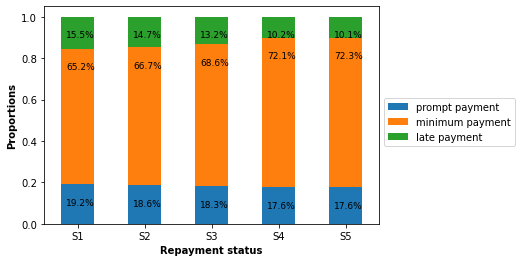

In [22]:
#create dataframe for plot
z = pd.DataFrame(y,columns=['prompt payment','minimum payment','late payment'],index=(['S1','S2','S3','S4','S5']))

z.plot.bar(stacked=True)
plt.ylabel('Proportions',weight='bold')
plt.xlabel('Repayment status',weight='bold')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1,0.6))

#To place proportions on stacked graph
for n, x in enumerate([*z.index.values]):
    for (proportion, y_loc) in zip(z.loc[x],z.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,y=y_loc - 0.1,s=f'{np.round(proportion * 100, 1)}%',color="black",fontsize=9);

##### 4th visualization - Violin plot (distribution of age to ratings)

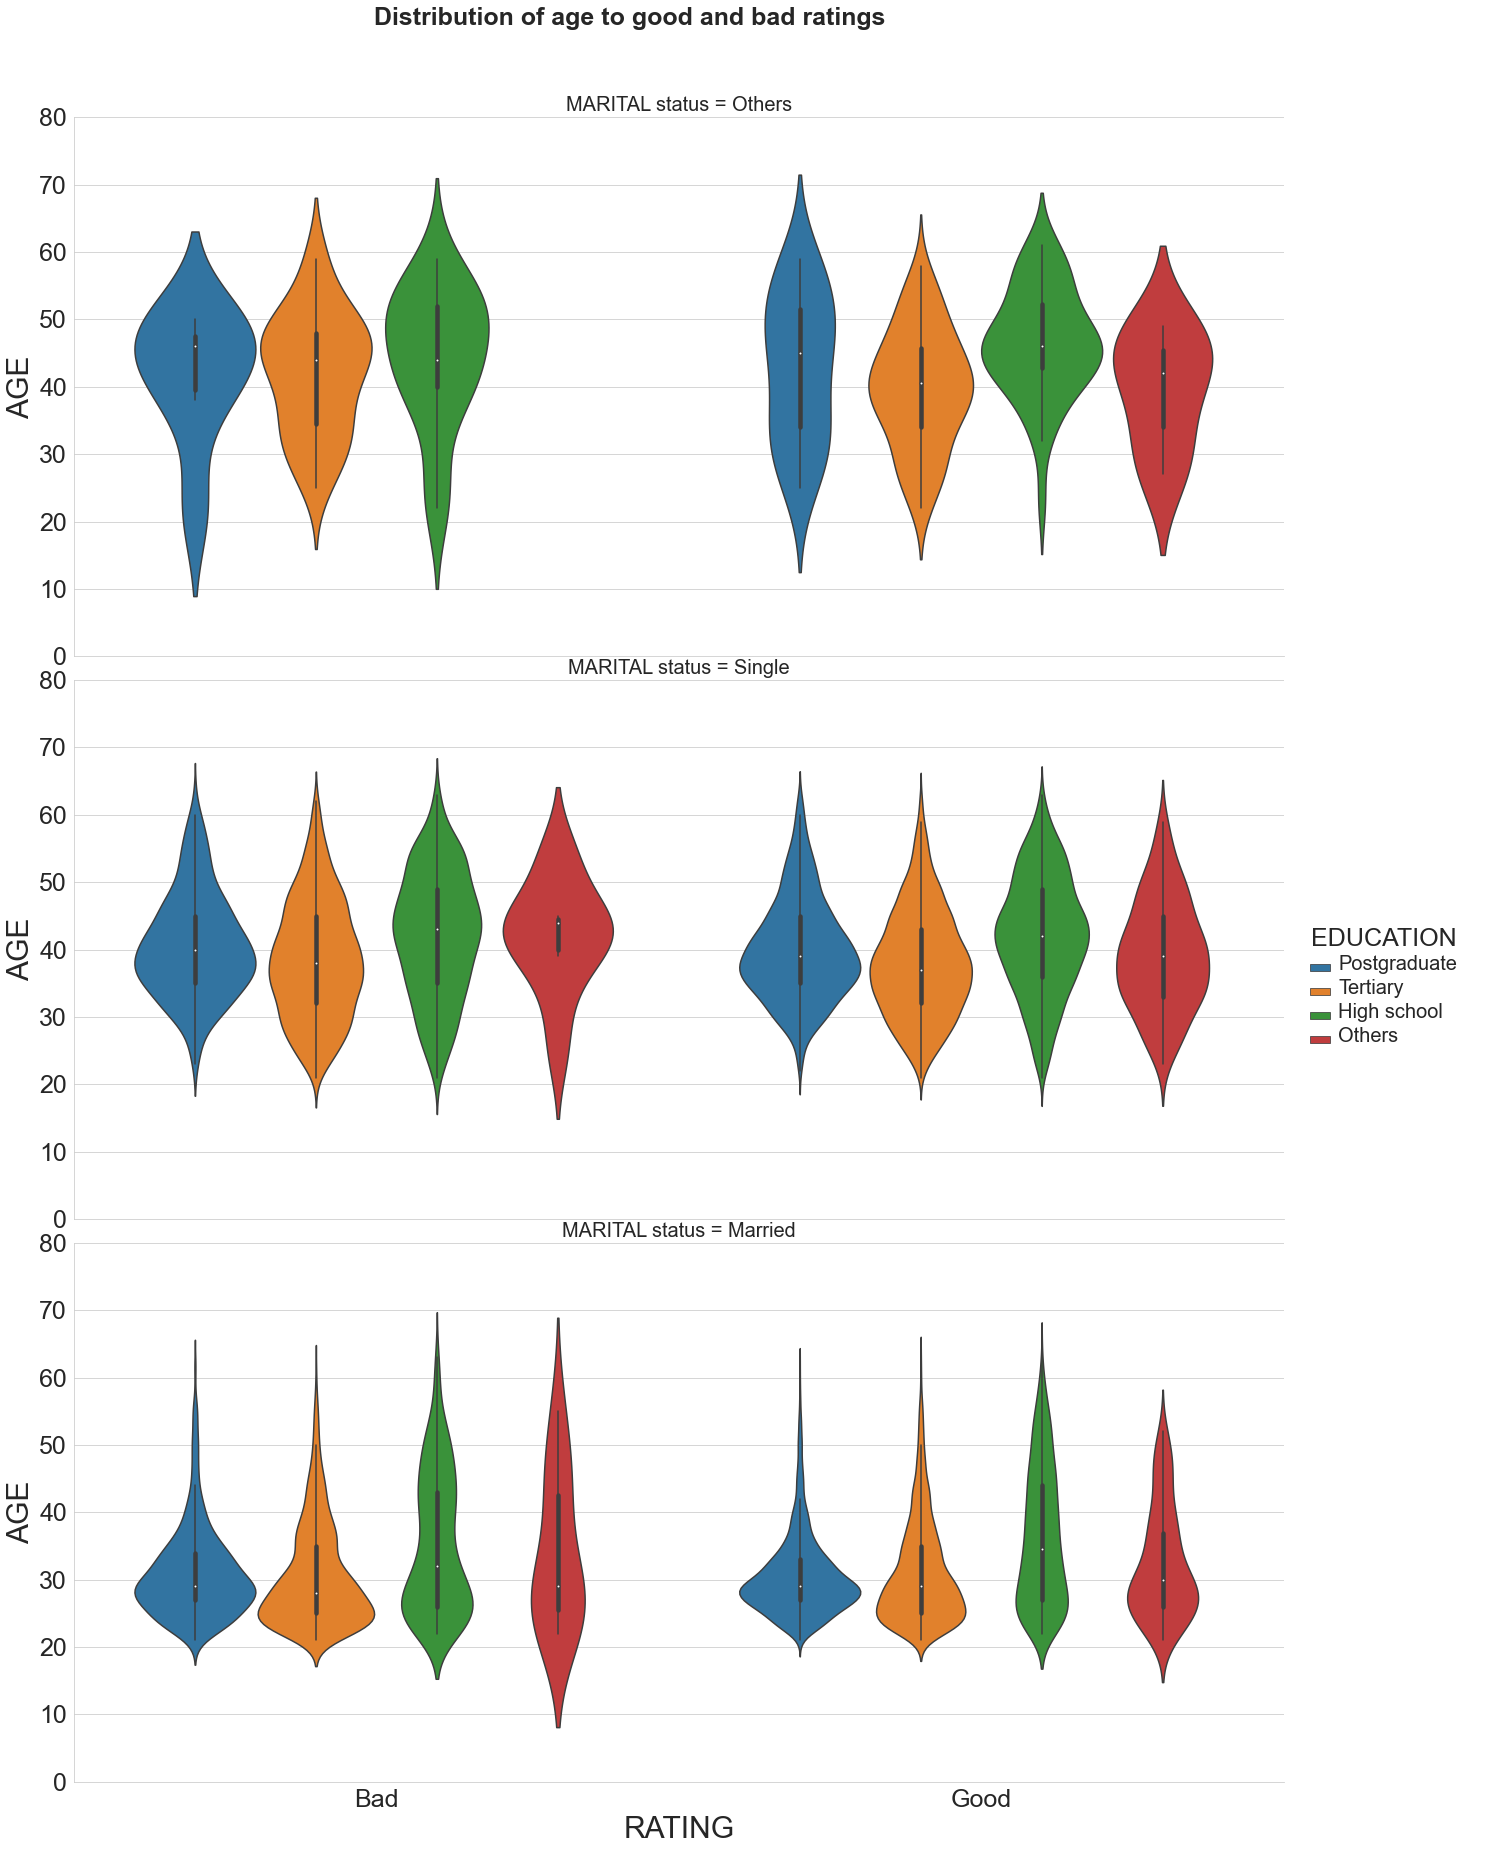

In [23]:
#Setting order of marital status to show
order=['0','1','2']
#setting up violin plot
sns.set_style('whitegrid')
ax = sns.catplot(x='RATING',y='AGE',hue='EDUCATION',
                 row='MARITAL',data=df,kind='violin',height=8,aspect=2.2,
                row_order=order)

fig = ax.fig

#Set overall title
fig.suptitle("Distribution of age to good and bad ratings",y=1.05,x=0.45,size=25,fontweight='bold')

#Set title of subplot
a0 = fig.axes[0].set_title('MARITAL status = Others',size=20)
a1 = fig.axes[1].set_title('MARITAL status = Single',size=20)
a2 = fig.axes[2].set_title('MARITAL status = Married',size=20)

#Customise overall axes
ax.set_xlabels('RATING',size=30)
ax.set_ylabels('AGE',size=30)
ax.set_xticklabels(['Bad','Good'],size=25)
ax.set_yticklabels(size=25)

#Customise legend
ax._legend.set_title('EDUCATION')
plt.setp(ax._legend.get_title(), fontsize=25)
new_labels = ['Postgraduate','Tertiary','High school','Others']
for t, l in zip(ax._legend.texts, new_labels):
    t.set_text(l)
plt.setp(ax._legend.get_texts(), fontsize=20)
plt.setp(ax._legend,bbox_to_anchor=(1.1,0.5));

##### 5th Visualization - Scatter plot (Relationship between numeric variables)

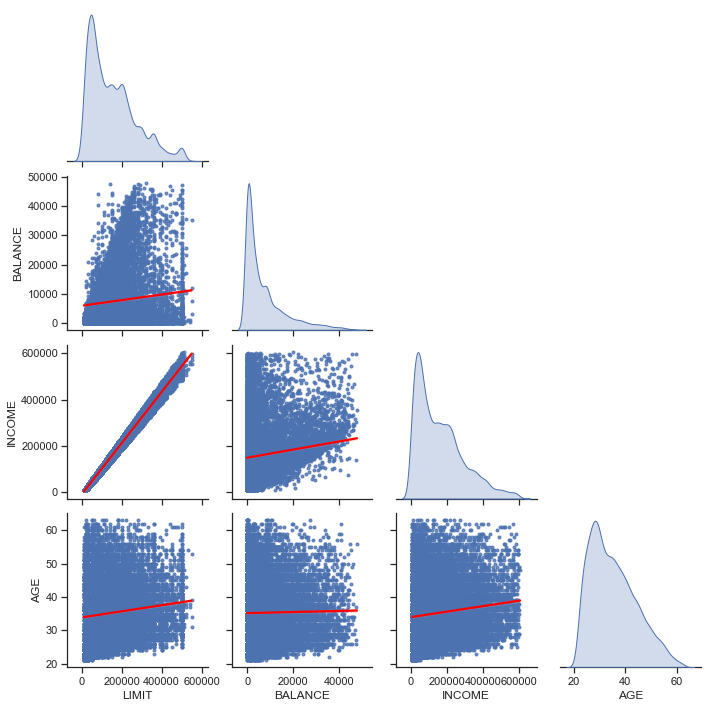

In [24]:
#set color style
sns.set(style="ticks", color_codes=True)

#set up pairplot for numeric variables
sns.pairplot(df[['LIMIT','BALANCE','INCOME','AGE']],markers='.',diag_kind='kde',
             corner=True,kind='reg',plot_kws={'line_kws':{'color':'red'}});

##### 6th visualization - Relationship between the income/limit ratio to balance for prev month

In [25]:
#copy original dataframe
df_ilr = df.copy()

#create new column for income-limit ratio
df_ilr['INCOME/LIMIT'] = df['INCOME']/df['LIMIT']

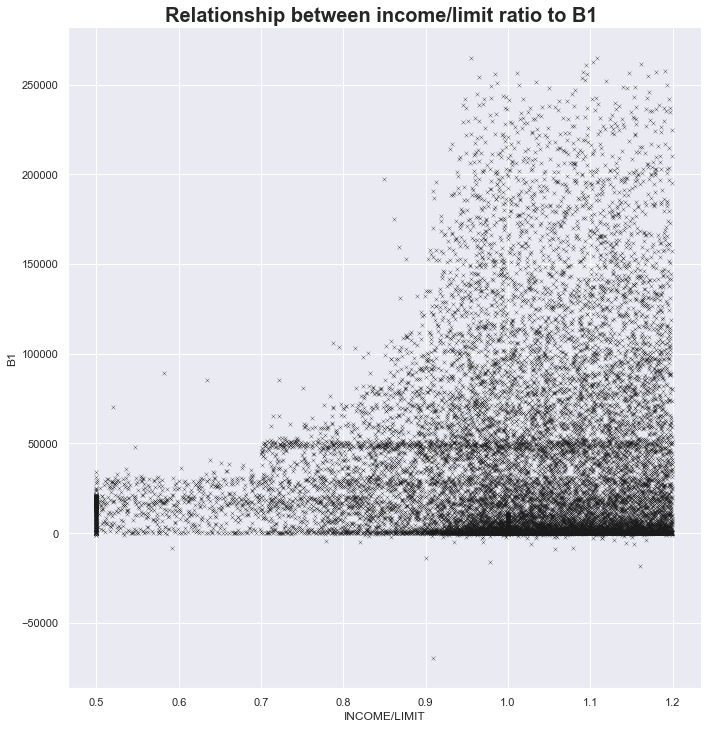

In [26]:
#Set plot style
sns.set_style("darkgrid")

#Set up scatterplot
ax1 = sns.relplot(x='INCOME/LIMIT',y='B1',data=df_ilr,
                  s=15,color='k',alpha=1,marker='x',height=10)
#Set title
plt.title('Relationship between income/limit ratio to B1 ',size=20,fontweight='bold');


# Question 4

In [27]:
df = df.reset_index()

In [28]:
#use min max normalization technique
scaler = sklearn.preprocessing.MinMaxScaler()

#create a copy of original dataframe
df_minmax = df.copy()

#get numeric columns
num_cols = df_minmax.select_dtypes('number').columns

#get categorical columns
cat_cols = df_minmax.select_dtypes('object').columns

#scale numeric columns
df_minmax = pd.DataFrame(scaler.fit_transform(df[num_cols[1:]]),columns=df[num_cols[1:]].columns)

#get categorical columns
df_minmax[cat_cols] = df[cat_cols]

#join numeric and categorical column
df_minmax = pd.get_dummies(df_minmax,drop_first=True)

df_minmax


,LIMIT,BALANCE,INCOME,AGE,B1,B2,B3,B4,B5,R1,...,S4_5,S4_6,S4_7,S5_0,S5_2,S5_3,S5_4,S5_5,S5_6,S5_7
0,0.370370,0.000000,0.378864,0.214286,0.208473,0.151698,0.172202,0.192384,0.301374,0.000000,...,0,0,0,1,0,0,0,0,0,0
1,0.018519,0.077007,0.020750,0.880952,0.272618,0.152356,0.172202,0.296693,0.305498,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.314815,0.001422,0.263233,0.500000,0.212237,0.153665,0.179197,0.207991,0.307113,0.008091,...,0,0,0,1,0,0,0,0,0,0
3,0.314815,0.473097,0.311241,0.119048,0.603401,0.567808,0.602254,0.669913,0.706350,0.000068,...,0,0,0,0,1,0,0,0,0,0
4,0.037037,0.103169,0.022079,0.547619,0.300278,0.249376,0.271275,0.300232,0.301374,0.000000,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,0.129630,0.264604,0.138388,0.309524,0.440640,0.412769,0.435931,0.492199,0.559856,0.047354,...,0,0,0,0,1,0,0,0,0,0
17049,0.388889,0.689063,0.362154,0.428571,0.784545,0.836949,0.471602,0.305756,0.352269,0.270592,...,0,0,0,1,0,0,0,0,0,0
17050,0.259259,0.006138,0.234823,0.523810,0.213934,0.163215,0.202750,0.211221,0.301374,0.047705,...,0,0,0,1,0,0,0,0,0,0
17051,0.037037,0.013001,0.034103,0.380952,0.218499,0.160768,0.243231,0.267085,0.363024,0.000000,...,0,0,0,1,0,0,0,0,0,0


In [29]:
#create string for regression later
df_ols = df_minmax.drop(['B1'],axis=1)

x = df_ols.columns
seperator = '+'
y = seperator.join(x)
z = 'B1 ~ ' + y 
print(z)

B1 ~ LIMIT+BALANCE+INCOME+AGE+B2+B3+B4+B5+R1+R2+R3+R4+R5+RATING_1+GENDER_1+EDUCATION_1+EDUCATION_2+EDUCATION_3+MARITAL_1+MARITAL_2+S1_0+S1_1+S1_2+S1_3+S1_4+S1_5+S1_6+S1_7+S2_0+S2_2+S2_3+S2_4+S2_5+S2_6+S2_7+S2_8+S3_0+S3_2+S3_3+S3_4+S3_5+S3_6+S3_7+S4_0+S4_2+S4_3+S4_4+S4_5+S4_6+S4_7+S5_0+S5_2+S5_3+S5_4+S5_5+S5_6+S5_7


In [30]:
#Split data into 80% training set, 20% testing set with seed=123
dftrain,dftest = train_test_split(df_minmax,test_size=0.2,random_state=123)

In [31]:
#Fit ols model to training set
mlr = ols(z,data=dftrain).fit()

#Use fitted model to predict B1 using test data
ypred = mlr.predict(dftest)

#print mean squared error of train model
print('MSE =',mlr.mse_resid)

#print r-squared of test model
print('Rsq =', r2_score(dftest.B1, ypred))

#print root mean squared error of test model
print('RMSPE =', np.sqrt(mean_squared_error(dftest.B1, ypred)))

#print summary of train model
print(mlr.summary())

MSE = 0.001060160143927481
Rsq = 0.9510581970862328
RMSPE = 0.033753752932899186
                            OLS Regression Results                            
Dep. Variable:                     B1   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     5147.
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:04:32   Log-Likelihood:                 27391.
No. Observations:               13642   AIC:                        -5.467e+04
Df Residuals:                   13585   BIC:                        -5.424e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [32]:
response='B1'
alpha = 0.05

#create function to remove insignificant predictors for each iteration
def backward_selection(df, response, alpha=0.05):
    
    #get all predictor variables
    predictors = df.columns.drop(response)
    model = []
    
    #Cannot have 0 predictors
    while len(predictors)>0:    
        
        #set up string for ols function
        seperator = '+'
        var_string = seperator.join(predictors)
        ols_string = 'B1 ~ ' + var_string 
        
        #fit ols model based on current predictors
        mlr = ols(ols_string,dftrain).fit()
        
        #create a list of the sets of predictors for each iteration
        model.append(mlr.model.exog_names)
        
        #Get the maximum p-value for the current set of predictors
        pmax = mlr.pvalues.iloc[1:].max()
        
        #remove predictors that is above the significance level
        if pmax > alpha:
            predictors = predictors.drop(mlr.pvalues.iloc[1:].idxmax())
        else:
            break
        
    #return the optimal predictors    
    return model[-1]

#get optimal predictors
new_predictors = backward_selection(dftrain, response, alpha)

In [33]:
#exclude intercept term
new_predictors = new_predictors[1:]

#set up string for ols function
seperator = '+'
var_string = seperator.join(new_predictors)
ols_string = 'B1 ~ ' + var_string

print(ols_string)

B1 ~ LIMIT+BALANCE+INCOME+B2+B5+R1+R2+R3+R4+R5+S1_0+S1_1+S1_2+S1_3+S2_0+S2_2+S2_3+S3_2


In [34]:
#fit model with optimal predictors
mlr_new = ols(ols_string,data=dftrain).fit()

#Use updated fitted model to predict B1 using test data
ypred_new = mlr_new.predict(dftest)

#print mean squared errors of residuals for train model
print('MSE =',mlr.mse_resid)

#print r-squared of test model
print('Rsq =', r2_score(dftest.B1, ypred_new))

#print root mean squared errors for test model
print('RMSPE =', np.sqrt(mean_squared_error(dftest.B1, ypred_new)))

#print summary for optimal model
mlr_new.summary()

MSE = 0.001060160143927481
Rsq = 0.9510530168560567
RMSPE = 0.0337555392134665


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     B1   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.603e+04
Date:                Sun, 04 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:04:37   Log-Likelihood:                 27381.
No. Observations:               13642   AIC:                        -5.472e+04
Df Residuals:                   13623   BIC:                        -5.458e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1290      0.001     93.545      0.000       0.126       0.132
LIMIT          0.0258      0.011      2.310      0.021       0.004       0.048
BALANCE        0.3263      0.004     84.417      0.000       0.319       0.334
INCOME        -0.0221      0.011     -1.987      0.047      -0.044      -0.000
B2             0.5806      0.006     98.140      0.000       0.569       0.592
B5            -0.0259      0.005     -5.446      0.000      -0.035      -0.017
R1            -0.0905      0.004    -25.060      0.000      -0.098      -0.083
R2             0.0238      0.003      7.981      0.000       0.018       0.030
R3             0.0089      0.003      3.101      0.002       0.003       0.015
R4             0.0156      0.003      5.113      0.000       0.010       0.022
R5             0.0067      0.003      2.142      0.032       0.001       0.013
S1_0          -0.0025      0.001     -2.342      0.019      -0.005      -0.000
S1_1          -0.0572      0.010     -5.799      0.000      -0.077      -0.038
S1_2          -0.0070      0.001     -5.394      0.000      -0.010      -0.004
S1_3          -0.0082      0.003     -2.858      0.004      -0.014      -0.003
S2_0           0.0030      0.001      2.740      0.006       0.001       0.005
S2_2           0.0077      0.001      5.407      0.000       0.005       0.010
S2_3           0.0068      0.003      2.311      0.021       0.001       0.013
S3_2          -0.0027      0.001     -2.486      0.013      -0.005      -0.001
==============================================================================
Omnibus:                    12848.582   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1930735.771
Skew:                           4.094   Prob(JB):                         0.00
Kurtosis:                      60.703   Cond. No.                         89.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print('old train model',mlr.rsquared_adj)
print('new train model',mlr_new.rsquared_adj)

old train model 0.9548016886808727
new train model 0.9548629624761583


## Qn 5

In [36]:
#get predictor names for new model
var_names = mlr_new.model.exog_names

#get coefficients from of new model
coefficients = (round(mlr_new.params,4))

#convert coefficients to string
l = []
for i in coefficients:
    l.append(str(i))

#combine coefficients with predictor as string 
test = []
for i,x in enumerate(var_names):
    test.append('(' + l[i]+' '+ x +')')

Regression_eqn = 'B1 = ' + seperator.join(test)

#print out the regression equation as string format
print(Regression_eqn)

B1 = (0.129 Intercept)+(0.0258 LIMIT)+(0.3263 BALANCE)+(-0.0221 INCOME)+(0.5806 B2)+(-0.0259 B5)+(-0.0905 R1)+(0.0238 R2)+(0.0089 R3)+(0.0156 R4)+(0.0067 R5)+(-0.0025 S1_0)+(-0.0572 S1_1)+(-0.007 S1_2)+(-0.0082 S1_3)+(0.003 S2_0)+(0.0077 S2_2)+(0.0068 S2_3)+(-0.0027 S3_2)


In [37]:
Regression_eqn_df = pd.DataFrame(coefficients,columns=['beta'])
Regression_eqn_df

,beta
Intercept,0.1290
LIMIT,0.0258
BALANCE,0.3263
INCOME,-0.0221
B2,0.5806
B5,-0.0259
R1,-0.0905
R2,0.0238
R3,0.0089
R4,0.0156


In [38]:
maxi = df['B1'].max()
mini = df['B1'].min()

#range of for B1
B1_range = maxi - mini

In [39]:
#change in B1 per unit change in normalised predictor

Regression_eqn_df['CHANGE'] = Regression_eqn_df['beta']*B1_range
Regression_eqn_df.drop('Intercept',axis=0)
    

,beta,CHANGE
LIMIT,0.0258,8635.4148
BALANCE,0.3263,109214.5678
INCOME,-0.0221,-7397.0026
B2,0.5806,194330.3036
B5,-0.0259,-8668.8854
R1,-0.0905,-30290.8930
R2,0.0238,7966.0028
R3,0.0089,2978.8834
R4,0.0156,5221.4136
R5,0.0067,2242.5302
